# SimpleRNN Test Code

> ## Import Packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt


%tensorflow_version 1.x
from keras import models, layers

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# I. SimpleRNN - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [2]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [3]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [4]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

* 80:20

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 4
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat


In [7]:
model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(4,
                             input_shape = (5, 1), 
                             return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [0]:
model_1.compile(loss = 'mse', 
                optimizer = 'RMSprop', 
                metrics = ['accuracy'])

### (3) Model Fit

In [10]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     validation_data = (X_test, y_test))




Train on 80 samples, validate on 20 samples
Epoch 1/100





80/80 [==============================] - 1s 9ms/step - loss: 4129.7335 - acc: 0.0000e+00 - val_loss: 4087.0366 - val_acc: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 143us/step - loss: 4125.0229 - acc: 0.0000e+00 - val_loss: 4083.1860 - val_acc: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 108us/step - loss: 4121.4494 - acc: 0.0000e+00 - val_loss: 4079.4839 - val_acc: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 120us/step - loss: 4118.0381 - acc: 0.0000e+00 - val_loss: 4075.8804 - val_acc: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 122us/step - loss: 4114.5766 - acc: 0.0000e+00 - val_loss: 4071.7046 - val_acc: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 0s 119us/step - loss: 4110.6979 - acc: 0.0000e+00 - val_loss: 4067.1851 - val_acc: 0.0000e+00
Epoch 7/100
80/80 [==============================] - 0s 123us/step -

### (4) Model Predict

In [0]:
y_hat = model_1.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

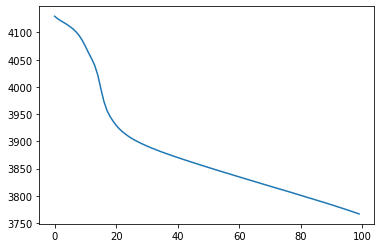

In [12]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

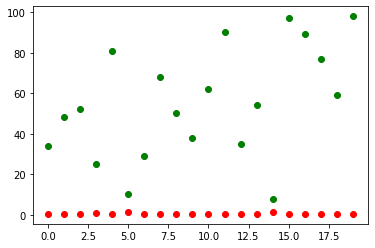

In [13]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [0]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [15]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [17]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(4,
                             input_shape = (None, 1), 
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [0]:
model_2.compile(loss = 'mae', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### (3) Model Fit

In [19]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 50, 
                     validation_data = (X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 0s 4ms/step - loss: 0.9684 - acc: 0.0125 - val_loss: 0.9723 - val_acc: 0.0000e+00
Epoch 2/50
80/80 [==============================] - 0s 105us/step - loss: 0.9361 - acc: 0.0125 - val_loss: 0.9394 - val_acc: 0.0000e+00
Epoch 3/50
80/80 [==============================] - 0s 99us/step - loss: 0.9047 - acc: 0.0125 - val_loss: 0.9066 - val_acc: 0.0000e+00
Epoch 4/50
80/80 [==============================] - 0s 119us/step - loss: 0.8736 - acc: 0.0125 - val_loss: 0.8739 - val_acc: 0.0000e+00
Epoch 5/50
80/80 [==============================] - 0s 119us/step - loss: 0.8431 - acc: 0.0125 - val_loss: 0.8435 - val_acc: 0.0000e+00
Epoch 6/50
80/80 [==============================] - 0s 135us/step - loss: 0.8128 - acc: 0.0125 - val_loss: 0.8131 - val_acc: 0.0000e+00
Epoch 7/50
80/80 [==============================] - 0s 122us/step - loss: 0.7820 - acc: 0.0125 - val_loss: 0.7844 - val_acc: 0.0000e+00
Epoch 8

### (4) Model Predict

In [0]:
y_hat = model_2.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

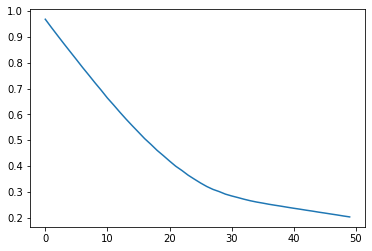

In [21]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

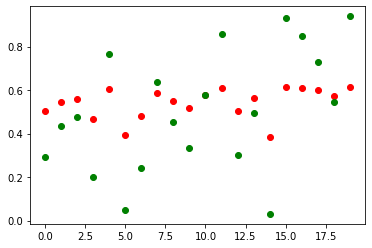

In [22]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# III. Stacked_SimpleRNN

> ## 1) Model Define & Summary

* return_sequences = True

In [23]:
model_4 = models.Sequential(name = 'Stackd_RNN')
model_4.add(layers.SimpleRNN(4,
                             input_shape = (None, 1), 
                             return_sequences = True))
model_4.add(layers.SimpleRNN(4,
                             input_shape = (None, 1),
                             return_sequences = False))
model_4.add(layers.Dense(1))

model_4.summary()

Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 4)           24        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [0]:
model_4.compile(loss = 'mae', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ## 3) Model Fit

In [25]:
Hist_4 = model_4.fit(X_train, y_train, 
                     epochs = 200, 
                     validation_data = (X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 1s 7ms/step - loss: 0.5063 - acc: 0.0125 - val_loss: 0.4680 - val_acc: 0.0000e+00
Epoch 2/200
80/80 [==============================] - 0s 171us/step - loss: 0.4654 - acc: 0.0125 - val_loss: 0.4273 - val_acc: 0.0000e+00
Epoch 3/200
80/80 [==============================] - 0s 204us/step - loss: 0.4343 - acc: 0.0125 - val_loss: 0.3928 - val_acc: 0.0000e+00
Epoch 4/200
80/80 [==============================] - 0s 171us/step - loss: 0.4056 - acc: 0.0125 - val_loss: 0.3645 - val_acc: 0.0000e+00
Epoch 5/200
80/80 [==============================] - 0s 162us/step - loss: 0.3784 - acc: 0.0125 - val_loss: 0.3399 - val_acc: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 159us/step - loss: 0.3540 - acc: 0.0125 - val_loss: 0.3158 - val_acc: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 197us/step - loss: 0.3307 - acc: 0.0125 - val_loss: 0.2923 - val_acc: 0.0000e+00

> ## 4) Model Predict

In [0]:
y_hat = model_4.predict(X_test)

> ## 5) 학습 결과 시각화

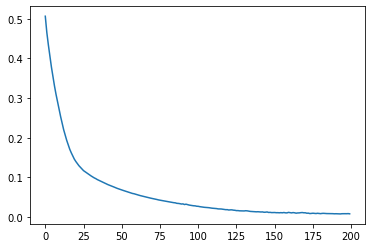

In [27]:
plt.plot(Hist_4.history['loss'])
plt.show()

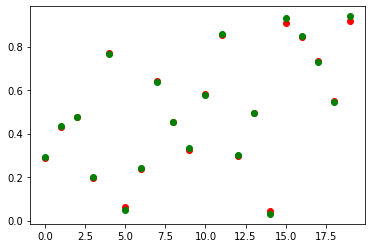

In [28]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# IV. "return_sequences" Output_Options

* False vs. True

> ## 1) 실습데이터 생성

In [0]:
import numpy as np

%tensorflow_version 1.x
from keras import models, layers

from sklearn.model_selection import train_test_split

In [0]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [0]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

* Input Data

In [33]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 2) False_Option

* 마지막 Output만 출력
 * Unit -> 1

In [0]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mae',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [35]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[1.]], dtype=float32)

* 마지막 Output만 출력
 * Unit -> 4

In [0]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(4,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mae',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [37]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[-1., -1.,  1.,  1.]], dtype=float32)

> ## 2) True_Option

* 매 순환마다 Output 출력
 * Unit -> 1
 * input_length -> 5

In [0]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mae',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]], dtype=float32)

* 매 순환마다 Output만 출력
 * Unit -> 4
 * input_length -> 5

In [0]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(4,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mae',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [41]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.9997619 ,  1.        ,  0.9688089 , -1.        ],
        [-0.9990942 ,  1.        ,  0.9672049 , -1.        ],
        [-0.9993382 ,  1.        ,  0.9714536 , -1.        ],
        [-0.99951357,  1.        ,  0.9753747 , -1.        ],
        [-0.9996426 ,  1.        ,  0.9787529 , -1.        ]]],
      dtype=float32)

# 
# 
# 
# The End
# 
# 
# 